In [94]:
import numpy as np  
import pandas as pd   
from scipy.stats import norm 
import matplotlib.pyplot as plt 

# Loading a CSV file containing MSFT adjusted closing price from 2000 to 2017

data = pd.read_csv('/Users/samy/Downloads/CSV-32/Python 3 CSV/MSFT_2000.csv', index_col='Date')
data

,MSFT
Date,
1999-12-31,38.965767
2000-01-03,38.903194
2000-01-04,37.589046
2000-01-05,37.985374
2000-01-06,36.712940
...,...
2017-10-12,77.120003
2017-10-13,77.489998
2017-10-16,77.650002


In [127]:
# Calculated the daily log returns of the stock
log_returns = np.log(1 + data.pct_change())
log_returns

,MSFT
Date,
1999-12-31,NaN
2000-01-03,-0.001607
2000-01-04,-0.034364
2000-01-05,0.010489
2000-01-06,-0.034072
...,...
2017-10-12,0.009118
2017-10-13,0.004786
2017-10-16,0.002063


In [98]:
# Stored the annual standard deviation of the log returns in a variable, called “stdev”
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values
stdev

array([0.30669071])

In [100]:
# This means that the stock’s annual log returns typically fall within ±31% of their average return about 68% of the time

In [102]:
# Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000.
# Created a variable, delta_t, equal to the quotient of T divided by the number of time intervals.
r = 0.025
T = 1
time_intervals = 250
delta_t = T/time_intervals
iterations = 10000

In [104]:
# Generate a matrix of random standard normal values
# Shape: (time_intervals + 1) rows and `iterations` columns
# Each column will represent one simulated price path
# Each row is the random shock at a given time step
Z = np.random.standard_normal((time_intervals+1,iterations))
Z

array([[-0.36000484,  0.08976524, -1.31831043, ..., -0.4546658 ,
         0.30373193, -0.32491062],
       [ 0.41327898, -1.24619367, -0.33367519, ..., -0.06230909,
         0.7555253 ,  0.47772902],
       [ 0.67898497, -1.38886203, -0.55829716, ...,  0.27053229,
         0.72094579,  0.217276  ],
       ...,
       [-0.77481204, -0.23056773,  0.03856196, ...,  0.83903234,
         0.42879001,  0.65567025],
       [-0.34127757, -1.78133886, -0.05379858, ...,  0.06143705,
         0.79718293, -0.64142076],
       [-0.64983522,  0.07629397,  1.48713238, ...,  1.60771194,
         0.13900255,  0.07666176]])

In [153]:
# Used the .zeros_like() method to create another variable, S, with the same dimension as Z.
# S is the matrix to be filled with future stock price data.
S = np.zeros_like(Z)
S


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
# Created a variable S0 equal to the last adjusted closing price of Microsoft using the “iloc” method.
S0 = data.iloc[-1]
S[0]= S0
S[0]

array([77.610001, 77.610001, 77.610001, ..., 77.610001, 77.610001,
       77.610001])

In [167]:
# Created a loop within the range (1, t_intervals + 1) that reassigns values to S in time t

for t in range(1, time_intervals + 1):
     S[t]= S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
    

In [169]:
S

array([[ 77.610001  ,  77.610001  ,  77.610001  , ...,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 78.22775274,  75.74981334,  77.10251812, ...,  77.50942803,
         78.74879456,  78.32560844],
       [ 79.25785403,  73.72989514,  76.26534419, ...,  77.91035958,
         79.85072151,  78.64947472],
       ...,
       [ 68.47351432,  77.32026224, 136.10344959, ..., 103.9963402 ,
         88.81534695,  73.53655238],
       [ 68.01574339,  74.68771432, 135.94951659, ..., 104.11117029,
         90.19140728,  72.62091386],
       [ 67.1578851 ,  74.79173273, 139.91584598, ..., 107.39951434,
         90.42694157,  72.72257262]])

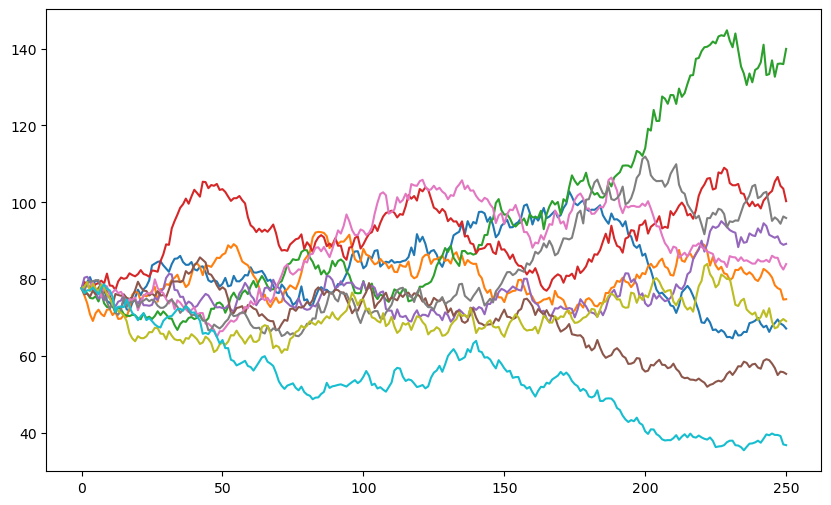

In [171]:
# Plotted the first 10 of the 10,000 generated iterations on a graph.

plt.figure(figsize = (10,6))
plt.plot(S[:,:10])
plt.show()

In [173]:
# Here we calculated the payoff for each future price at maturity using the Monte Carlo simulation 
# Strike price is 110
# Used numpy.maximum to create a vector called p with as many elements as there are columns in the S matrix

p = np.maximum(S[-1] - 110, 0)
p

array([ 0.        ,  0.        , 29.91584598, ...,  0.        ,
        0.        ,  0.        ])

In [175]:
p.shape

(10000,)

In [177]:
# We calculated the call option price C but averaging the future payoff prices and discounting it for today's value

C = np.exp(-r * T) * np.sum(p) / iterations
C

2.0440247333724075

In [ ]:
# We noticed that this quite the same price as we found using the Black Scholes formula in our previous task